In [10]:
import numpy as np
import scienceplots
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{stmaryrd}')


plt.style.use(["science", "grid"])
plt.rcParams.update({
    'font.size': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'grid.alpha': 0.7
})

# -----------------------------
# Problem setup (edit below)
# -----------------------------
n_points = 20
x_min, x_max = -1.0, 1.0
t = 0                   # tuning parameter for \bar{eta}(x) = 1{x > t}
c = 0.5                # cost for false negatives (Y=1 but predict 0)
c_bar = 0.5             # cost for false positives (Y=0 but predict 1)

# Instance space and uniform marginal
X = np.linspace(x_min, x_max, n_points)
pX = np.ones_like(X) / len(X)

# Base label distribution eta(x) = 1{x > 0}
eta = (X > 0).astype(float)
sen_eta = (X > t).astype(float)

def B_lambda(eta_val, eta_bar_val, lmd, c=0.5, c_bar=0.5):
    """Implements B_λ(η, η̄_DP) = |η - c| * [[ (η - c) * (η - c - λ (η̄_DP - c̄)) < 0 ]]."""
    left = eta_val - c
    right = eta_val - c - lmd * (eta_bar_val - c_bar)
    indicator = (left * right) < 0
    return np.abs(left) * indicator

def pareto_frontier(eta, sen_eta, lmd, c=0.5, c_bar=0.5):
    """F(τ) = E_X[B_λ(η(X), η̄_DP(X))]"""
    B_vals = B_lambda(eta, sen_eta, lmd, c=c, c_bar=c_bar)
    return np.sum(pX * B_vals)

In [11]:
eta = (X >0).astype(float)
sen_eta = (X >0.95).astype(float)

lambdas = np.linspace(-2, 2, 300)   # 100 points between 0 and 1
risks = [pareto_frontier(eta, sen_eta, lmd, X, pX) for lmd in lambdas]

sen_eta = (X >0.5).astype(float)
risks_t_02 = [pareto_frontier(eta, sen_eta, lmd, X, pX) for lmd in lambdas]

sen_eta = (X > -0.5).astype(float)
risks_t_03 = [pareto_frontier(eta, sen_eta, lmd, X, pX) for lmd in lambdas]

#sen_eta = (X > 0.95).astype(float)
#risks_t_04 = [pareto_frontier(eta, sen_eta, lmd, X, pX) for lmd in lambdas]

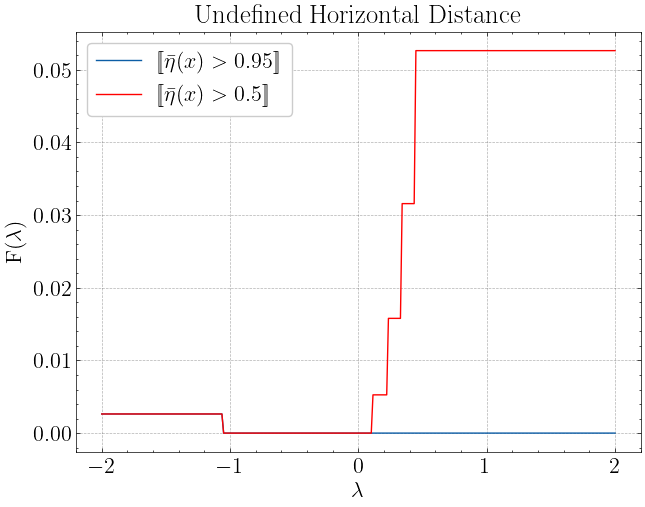

In [13]:
textwidth =  7.285
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio
plt.figure(figsize=(width, height))
plt.plot(lambdas, risks, linewidth=1, label=r"$\left[\!\left[ \bar{\eta}(x) > 0.95 \right]\!\right] $")
plt.plot(lambdas, risks_t_02, linewidth=1, c="red", label=r"$\left[\!\left[ \bar{\eta}(x) > 0.5 \right]\!\right] $")
#plt.plot(lambdas, risks_t_02, linewidth=1, c="red", 
         
#plt.plot(lambdas, risks_t_03, linewidth=1, c="blue")
#plt.plot(lambdas, risks_t_04, linewidth=1, c="green")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"F($\lambda$)")
plt.title("Undefined Horizontal Distance")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()